In [920]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**About the Data**

This IBM dataset contains human resources (HR) data for a variety of different departments across the company, with data for 1470 employees in total. Employee age, distance commuted, education level, environment satisfaction, job involvement, and compensation are displayed, amongst other miscellaneous employee metrics. Employees are spread across three departments: Sales, Human Resources, and Research & Development.


**Analytical Questions**

Given this exhaustive set of data, there are a variety of different analytical questions we can pose in order to derive valuable intuition from it. In this report, we will focus on the following questions:

1) Do employees with a higher average monthly salary report higher numbers of environment satisfaction?

2) Do employees with a higher average monthly salary report lower numbers of work/life balance?

3) Is the hourly rate for the Research & Development department higher than that of other departments?

In [921]:
#First load the csv file
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

#Summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


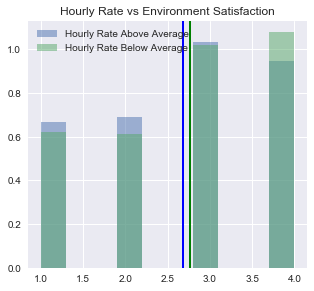

In [922]:
df1 = df[df['HourlyRate']>=df['HourlyRate'].mean()]
df2 = df[df['HourlyRate']<=df['HourlyRate'].mean()]

plt.figure(figsize=(5,10))
plt.subplot(2, 1, 1)
plt.hist(df1['EnvironmentSatisfaction'], label = 'Hourly Rate Above Average', alpha = 0.5, density = True)
plt.axvline(df1['EnvironmentSatisfaction'].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Hourly Rate vs Environment Satisfaction')
plt.hist(df2['EnvironmentSatisfaction'], label = 'Hourly Rate Below Average', alpha = 0.5, density = True)
plt.axvline(df2['EnvironmentSatisfaction'].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper left')
plt.show()

The above plot essentially places the workers into four separate bins for each of the four possible environment satisfaction scores they reported. We can actually see that there are slightly more workers with an above-average salary reporting lower environment satisfaction scores, while there are slightly more workers with a below-average salary reporting higher environment satisfaction scores. The vertical lines placed at the means for both categories also verifies this conclusion - the mean environment satisfaction score for above-average paid employees is slightly lower than that for below-average paid employees. Thus, our initial conclusion is disproved by this data.

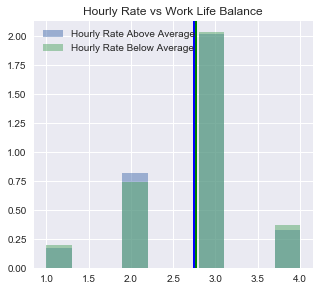

In [923]:
df1 = df[df['HourlyRate']>=df['HourlyRate'].mean()]
df2 = df[df['HourlyRate']<=df['HourlyRate'].mean()]

plt.figure(figsize=(5,10))
plt.subplot(2, 1, 1)
plt.hist(df1['WorkLifeBalance'], label = 'Hourly Rate Above Average', alpha = 0.5, density = True)
plt.axvline(df1['WorkLifeBalance'].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Hourly Rate vs Work Life Balance')
plt.hist(df2['WorkLifeBalance'], label = 'Hourly Rate Below Average', alpha = 0.5, density = True)
plt.axvline(df2['WorkLifeBalance'].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper left')
plt.show()

Just as with question 1, the above chart places employees into four separate bins for Work Life Balance score. We see that the majority of employees have reported a score of 3 out of 4; however, the average score is virtually unchanged for employees earning an above average wage, and for those earning a below average wave. This clearly indicates that employee wage is not a predictor of work/life balance.

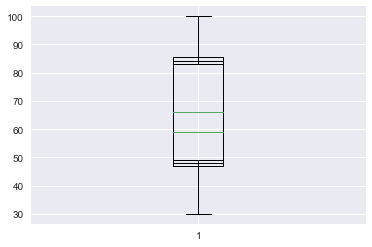

Research & Development Avg Hourly Rate:  66.16753381893861
Research & Development Std Dev Hourly Rate:  20.24928051847232
Sales Avg Hourly Rate:  65.5201793721973
Sales Std Dev Hourly Rate:  20.35446108989104
Human Resources Avg Hourly Rate:  64.3015873015873
Human Resources Std Dev Hourly Rate:  21.56208958142173


In [924]:
df1 = df[df['Department']=='Research & Development']
df2 = df[df['Department']=='Sales']
df3 = df[df['Department']=='Human Resources']

plt.subplot(1, 1, 1)
plt.boxplot(df1['HourlyRate'])
plt.boxplot(df2['HourlyRate'])
plt.boxplot(df3['HourlyRate'])

plt.show()
print('Research & Development Avg Hourly Rate: ', df1['HourlyRate'].mean())
print('Research & Development Std Dev Hourly Rate: ', df1['HourlyRate'].std())

print('Sales Avg Hourly Rate: ', df2['HourlyRate'].mean())
print('Sales Std Dev Hourly Rate: ', df2['HourlyRate'].std())

print('Human Resources Avg Hourly Rate: ', df3['HourlyRate'].mean())
print('Human Resources Std Dev Hourly Rate: ', df3['HourlyRate'].std())


From the above box plots and calculations, we can see that the Research & Development department has the highest average hourly rate at roughly 66. However, this is only marginally higher than the other two departments, Sales and Human Resources, which have average hourly rates of roughly 64 and 65, respectively.

**Conclusion**

In conclusion, we were able to derive some key charts from the IBM HR data and obtain valuable insights regarding the employee data. We found that employees with a higher salary do not necessarily report higher levels of environment satisfaction, indicating that there are additional variables that employees take into consideration, besides just salary. Additionally, we found that Research & Development employees have the highest reported average hourly wage, which makes sense, as Research & Development is a more technically challenging department to work in than Sales or Human Resources. Finally, we saw that Research & Development has a lowest attrition rate of the three departments, indicating that it is the most stable department and that most employees are likely happy working in that department.

An additional question we may pose for further research is the following:

Which department reports the highest attrition rate?

In order to investigate this question, we would have to create a new dataframe that stores the value counts for the Attrition column for each department, as below:

In [925]:
df1 = df['Attrition'].groupby(df['Department']).value_counts()
print(df1)

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64


From here, we can plot a bar chart which shows the frequency of 'yes' and 'no' attrition values for each department, which will then give us an idea of which department is more stable and experiences the least turnover.